<a href="https://colab.research.google.com/github/JSJeong-me/AI-Innovation-2024/blob/main/OpenCV/3-4-Convex-Hull-Option.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 랜덤한 점들 생성
points = np.random.randint(0, 300, (25, 2))

# 흰색 배경 이미지 생성
img = np.zeros((400, 400, 3), dtype=np.uint8)
img.fill(255)


In [2]:

# Convex Hull 계산 (returnPoints=True 기본값)
hull = cv2.convexHull(points, returnPoints=True)

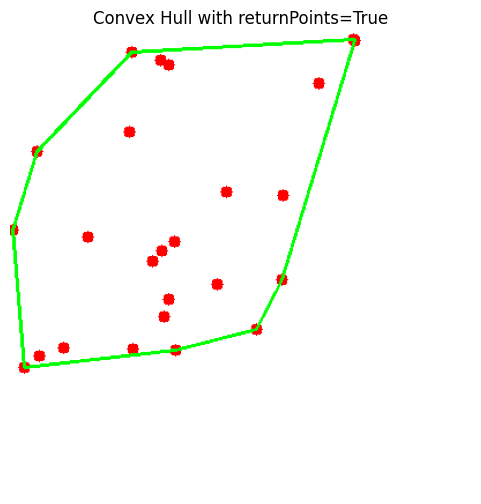

In [3]:


# 점들을 이미지에 그리기
for point in points:
    cv2.circle(img, tuple(point), 5, (0, 0, 255), -1)

# Convex Hull을 이미지에 그리기
cv2.polylines(img, [hull], True, (0, 255, 0), 2)

# 결과 출력
plt.figure(figsize=(6,6))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Convex Hull with returnPoints=True')
plt.axis('off')
plt.show()


In [4]:
# Convex Hull 계산 (returnPoints=False, 인덱스 반환)
hull_indices = cv2.convexHull(points, returnPoints=False)

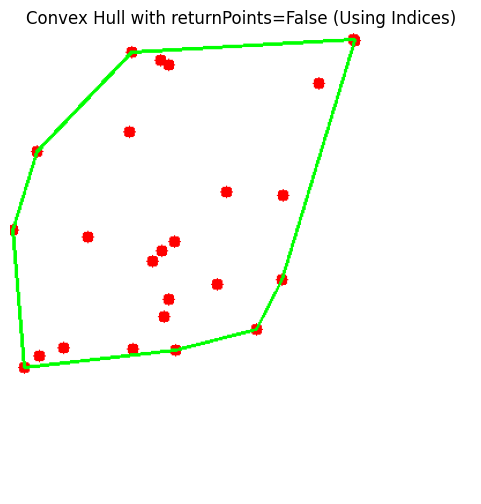

In [5]:


# 흰색 배경 이미지 생성
img2 = np.zeros((400, 400, 3), dtype=np.uint8)
img2.fill(255)

# 점들을 이미지에 그리기
for point in points:
    cv2.circle(img2, tuple(point), 5, (0, 0, 255), -1)

# Hull 인덱스를 사용하여 선 그리기
for i in range(len(hull_indices)):
    start_idx = hull_indices[i][0]
    end_idx = hull_indices[(i+1) % len(hull_indices)][0]
    cv2.line(img2, tuple(points[start_idx]), tuple(points[end_idx]), (0, 255, 0), 2)

# 결과 출력
plt.figure(figsize=(6,6))
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.title('Convex Hull with returnPoints=False (Using Indices)')
plt.axis('off')
plt.show()


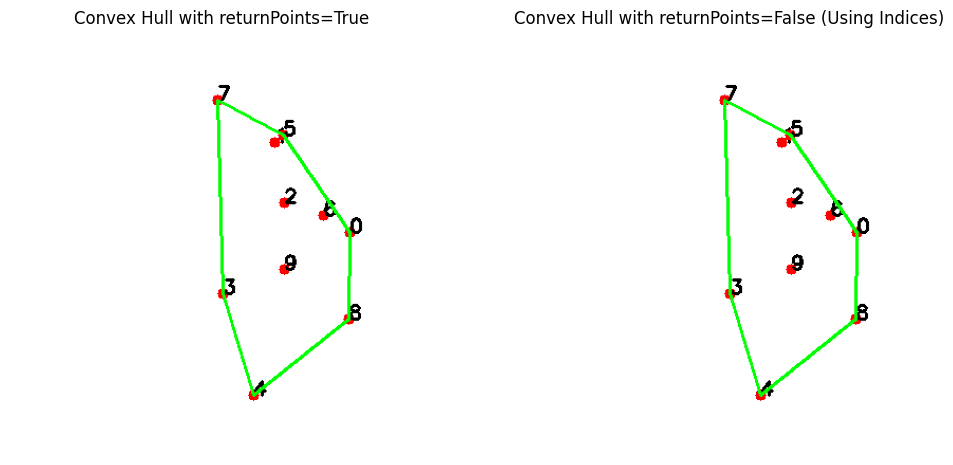

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 랜덤한 점들 생성
points = np.random.randint(50, 350, (10, 2))

# 흰색 배경 이미지 생성
img_true = np.zeros((400, 400, 3), dtype=np.uint8)
img_false = np.zeros((400, 400, 3), dtype=np.uint8)
img_true.fill(255)
img_false.fill(255)

# 모든 점을 이미지에 그리기
for i, point in enumerate(points):
    cv2.circle(img_true, tuple(point), 5, (0, 0, 255), -1)  # 빨간색 점
    cv2.circle(img_false, tuple(point), 5, (0, 0, 255), -1)
    cv2.putText(img_true, f'{i}', tuple(point), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 0), 2)
    cv2.putText(img_false, f'{i}', tuple(point), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 0), 2)

# Convex Hull 계산 (returnPoints=True)
hull_true = cv2.convexHull(points, returnPoints=True)

# Convex Hull 계산 (returnPoints=False)
hull_false = cv2.convexHull(points, returnPoints=False)

# Convex Hull을 이미지에 그리기 (returnPoints=True)
cv2.polylines(img_true, [hull_true], True, (0, 255, 0), 2)

# Convex Hull을 인덱스 기반으로 그리기 (returnPoints=False)
for i in range(len(hull_false)):
    start_idx = hull_false[i][0]
    end_idx = hull_false[(i+1) % len(hull_false)][0]
    cv2.line(img_false, tuple(points[start_idx]), tuple(points[end_idx]), (0, 255, 0), 2)

# 두 가지 결과를 비교 출력
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# returnPoints=True 결과
axs[0].imshow(cv2.cvtColor(img_true, cv2.COLOR_BGR2RGB))
axs[0].set_title('Convex Hull with returnPoints=True')
axs[0].axis('off')

# returnPoints=False 결과
axs[1].imshow(cv2.cvtColor(img_false, cv2.COLOR_BGR2RGB))
axs[1].set_title('Convex Hull with returnPoints=False (Using Indices)')
axs[1].axis('off')

plt.show()
